nnUNet

Libraries

In [ ]:
import os
import shutil
from collections import OrderedDict

import json
import matplotlib.pyplot as plt
import nibabel as nib

import numpy as np
import torch

Google Drive Mounting

In [ ]:
from google.colab import drive
drive.mount('/content/drive',force_remount = True)

drive_dir = "/content/drive/My Drive"
mount_dir = os.path.join(drive_dir, "Colab Notebooks")
base_dir = os.getcwd()

assert os.path.exists(drive_dir) # if this fails, something went wrong with mounting GoogleDrive
if os.path.exists(mount_dir) is False:
    os.makedirs(mount_dir)

Mounted at /content/drive


PyTorch GPU

In [ ]:
# check whether GPU accelerated computing is available
assert torch.cuda.is_available() # if there is an error here, enable GPU in the Runtime
print("GPU available:", torch.cuda.is_available())

if torch.cuda.is_available():
    device = torch.device("cuda")
    print(f"Pytorch version: {torch.__version__}")
    print(f"Device name: {torch.cuda.get_device_name(0)}")
else:
    device = torch.device("cpu")
    print("No GPU available.")

GPU available: True
Pytorch version: 2.0.1+cu118
Device name: Tesla T4


Folder & Data Setup

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.2/178.2 kB 3.9 MB/s eta 0:00:00
  Installing build dependencies ... done
  Getting requirements to build wheel ... done
  Preparing metadata (pyproject.toml) ... done
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 43.6/43.6 kB 5.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 61.7/61.7 kB 9.2 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.6/52.6 MB 36.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 37.3/37.3 MB 50.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.1/3.1 MB 9.8 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.4/96.4 kB 13.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.8/1.8 MB 81.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.0/13.0 MB 30.3 MB/s eta 0:00:00
  Created wheel for 

Current Working Directory /content
/content/drive/My Drive/Colab Notebooks/nnUNet_raw exists.
/content/drive/My Drive/Colab Notebooks/nnUNet_preprocessed exists.
/content/drive/My Drive/Colab Notebooks/nnUNet_results exists.
If No Error Occured Continue Forward. =)
/content/drive/My Drive/Colab Notebooks/nnUNet_raw/Dataset001_Tibia exists.
/content/drive/My Drive/Colab Notebooks/nnUNet_raw/Dataset001_Tibia/imagesTr exists.
/content/drive/My Drive/Colab Notebooks/nnUNet_raw/Dataset001_Tibia/labelsTr exists.
/content/drive/My Drive/Colab Notebooks/nnUNet_raw/Dataset001_Tibia/imagesTs exists.
train image files: 5
train label files: 5
Matches: 0
Modality present: msk_007_0000.nii.gz
Modality present: msk_011_0000.nii.gz
Modality present: msk_021_0000.nii.gz
Modality present: msk_007R_0000.nii.gz
Modality present: msk_021R_0000.nii.gz
Modality present: msk_004_0000.nii.gz
dataset.json already exist!
dataset.json overwritten!
(5, 512, 512, 1) (5, 512, 512, 1)
5


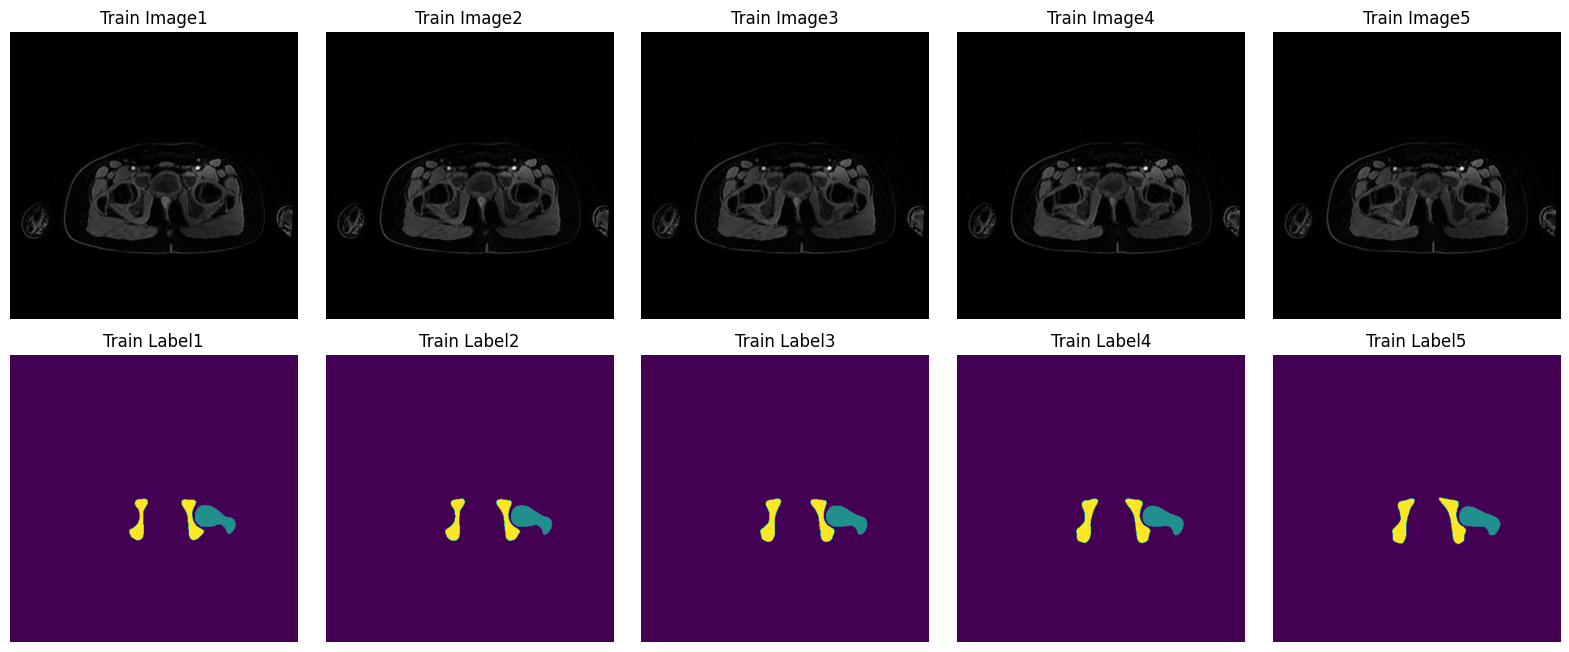

In [ ]:
!pip install nnunetv2
import nnunetv2

def make_if_dont_exist(folder_path,overwrite=False):
    """
    creates a folder if it does not exists
    input:
    folder_path : relative path of the folder which needs to be created
    over_write :(default: False) if True overwrite the existing folder
    """
    if os.path.exists(folder_path):

        if not overwrite:
            print(f"{folder_path} exists.")
        else:
            print(f"{folder_path} overwritten")
            shutil.rmtree(folder_path)
            os.makedirs(folder_path)

    else:
      os.makedirs(folder_path)
      print(f"{folder_path} created!")

# Maybe move path of preprocessed data directly on content - this may be signifcantely faster!
print("Current Working Directory {}".format(os.getcwd()))
path_dict = {
    "nnUNet_raw" : os.path.join(mount_dir, "nnUNet_raw"),
    "nnUNet_preprocessed" : os.path.join(mount_dir, "nnUNet_preprocessed"), # 1 experiment: 1 epoch took 112s
    # "nnUNet_preprocessed" : os.path.join(base_dir, "nnUNet_preprocessed"), # 1 experiment: 1 epoch took 108s -> seems faster take this
    "nnUNet_results" : os.path.join(mount_dir, "nnUNet_results"),
}

# Write paths to environment variables
for env_var, path in path_dict.items():
  os.environ[env_var] = path

# Check whether all environment variables are set correct!
for env_var, path in path_dict.items():
  if os.getenv(env_var) != path:
    print("Error:")
    print("Environment Variable {} is not set correctly!".format(env_var))
    print("Should be {}".format(path))
    print("Variable is {}".format(os.getenv(env_var)))
  make_if_dont_exist(path, overwrite=False)

print("If No Error Occured Continue Forward. =)")






# Create Folderstructure for the new task!
task_name = 'Dataset001_Tibia' #change here for different task name
nnunet_raw = os.getenv("nnUNet_raw")
# nnunet_raw_data = "nnUNet/nnunet/nnUNet_raw_data_base/nnUNet_raw_data"
task_folder_name = os.path.join(nnunet_raw,task_name)
train_image_dir = os.path.join(task_folder_name,'imagesTr')
train_label_dir = os.path.join(task_folder_name,'labelsTr')
test_dir = os.path.join(task_folder_name,'imagesTs')
# main_dir = os.path.join(base_dir,'nnUNet/nnunet')

# Create Folder Structure for the SCGM Task on the system
make_if_dont_exist(task_folder_name)
make_if_dont_exist(train_image_dir)
make_if_dont_exist(train_label_dir)
make_if_dont_exist(test_dir)

training_data_name="training-data"
test_data_name="test-data"




train_files = os.listdir(train_image_dir)
label_files = os.listdir(train_label_dir)
print("train image files:",len(train_files))
print("train label files:",len(label_files))
print("Matches:",len(set(train_files).intersection(set(label_files))))
#renaming to add the modality for SCGM there is only one modality
#images should be added with 0000
#can be skipped if modality is already mentioned
#re-write for multiple modalities

def check_modality(filename):
    """
    check for the existence of modality
    return False if modality is not found else True
    """
    end = filename.find('.nii.gz')
    modality = filename[end-4:end]
    for mod in modality:
        if not(ord(mod)>=48 and ord(mod)<=57): #if not in 0 to 9 digits
            return False
    return True

def rename_for_single_modality(directory):

    for file in os.listdir(directory):

        if check_modality(file)==False:
            new_name = file[:file.find('.nii.gz')]+"_0000.nii.gz"
            os.rename(os.path.join(directory,file),os.path.join(directory,new_name))
            print(f"Renamed to {new_name}")
        else:
            print(f"Modality present: {file}")

rename_for_single_modality(train_image_dir)

# again skip test due to non available data
rename_for_single_modality(test_dir)







overwrite_json_file = True #make it True if you want to overwrite the dataset.json file in Task_folder
json_file_exist = False

if os.path.exists(os.path.join(task_folder_name,'dataset.json')):
    print('dataset.json already exist!')
    json_file_exist = True

if json_file_exist==False or overwrite_json_file:

    json_dict = OrderedDict()
    json_dict['name'] = task_name
    json_dict['description'] = "Musculoskeletal Lower Limb Segmentation"
    json_dict['tensorImageSize'] = "3D"
    json_dict['reference'] = "see challenge website"
    json_dict['licence'] = "see challenge website"
    json_dict['release'] = "0.0"

    #you may mention more than one modality
    json_dict['channel_names'] = {
        "0": "MRI"
    }
    #labels+1 should be mentioned for all the labels in the dataset
    json_dict['labels'] = {
        "background": 0,
        "TIBIA": 1,
        "FEMUR": 2,
        "FIBULA": 3,
        "PELVIS" : 4
    }

    train_ids = os.listdir(train_label_dir)
    test_ids = os.listdir(test_dir)
    json_dict['numTraining'] = len(train_ids)
    json_dict['numTest'] = len(test_ids)
    json_dict['file_ending'] = ".nii.gz"

    #no modality in train image and labels in dataset.json
    json_dict['training'] = [{'image': "./imagesTr/%s" % i, "label": "./labelsTr/%s" % i} for i in train_ids]

    #removing the modality from test image name to be saved in dataset.json
    json_dict['test'] = ["./imagesTs/%s" % (i[:i.find("_0000")]+'.nii.gz') for i in test_ids]

    with open(os.path.join(task_folder_name,"dataset.json"), 'w') as f:
        json.dump(json_dict, f, indent=4, sort_keys=True)

    if os.path.exists(os.path.join(task_folder_name,'dataset.json')):
        if json_file_exist==False:
            print('dataset.json created!')
        else:
            print('dataset.json overwritten!')





train_img_name = os.listdir(train_image_dir)[1]
train_img = np.array(nib.load(os.path.join(train_image_dir,train_img_name)).dataobj)[80:85,:,:,:]
train_label_name = train_img_name[:train_img_name.find('_0000.nii.gz')]+'.nii.gz'
train_label = np.array(nib.load(os.path.join(train_label_dir,train_label_name)).dataobj)[80:85,:,:,:]

print(train_img.shape,train_label.shape)

max_rows = 2
max_cols = train_img.shape[0]
print(max_cols)

fig, axes = plt.subplots(nrows=max_rows, ncols=max_cols, figsize=(20,8))
for idx in range(max_cols):
    axes[0, idx].axis("off")
    axes[0, idx].set_title('Train Image'+str(idx+1))
    axes[0, idx].imshow(train_img[idx,:,:,0], cmap="gray")
for idx in range(max_cols):
    axes[1, idx].axis("off")
    axes[1, idx].set_title('Train Label'+str(idx+1))
    axes[1, idx].imshow(train_label[idx,:,:,0])

plt.subplots_adjust(wspace=.1, hspace=.1)
plt.show()

Preprocessing

In [ ]:
run_Proprocessing = True
if (run_Proprocessing == True):
  !nnUNetv2_plan_and_preprocess -d 001 --verify_dataset_integrity

Fingerprint extraction...
Dataset001_Tibia
Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer

####################
verify_dataset_integrity Done. 
If you didn't see any error messages then your dataset is most likely OK!
####################

Using <class 'nnunetv2.imageio.simpleitk_reader_writer.SimpleITKIO'> as reader/writer
100% 5/5 [00:20<00:00,  4.16s/it]
Experiment planning...
Attempting to find 3d_lowres config. 
Current spacing: [1.03 1.03 1.03]. 
Current patch size: [128 112 160]. 
Current median shape: [497.08737864 396.11650485 542.7184466 ]
Attempting to find 3d_lowres config. 
Current spacing: [1.0609 1.0609 1.0609]. 
Current patch size: [128 112 160]. 
Current median shape: [482.60910548 384.57913093 526.91111321]
Attempting to find 3d_lowres config. 
Current spacing: [1.092727 1.092727 1.092727]. 
Current patch size: [128 112 160]. 
Current median shape: [468.55252959 373.37779702 511.56418758]
Attempting to find 3d_lowres config. 
Cur

Training

In [ ]:
# 3d_fullres, 3d_lowres , 2d, 3d_cascade_fullres
run_ModelTraining = True
if (run_ModelTraining == True):
  !nnUNetv2_train 001 3d_fullres 4


Using device: cuda:0

#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################


This is the configuration used by this training:
Configuration name: 2d
 {'data_identifier': 'nnUNetPlans_2d', 'preprocessor_name': 'DefaultPreprocessor', 'batch_size': 12, 'patch_size': [448, 576], 'median_image_size_in_voxels': [408.0, 559.0], 'spacing': [1.0, 1.0], 'normalization_schemes': ['ZScoreNormalization'], 'use_mask_for_norm': [False], 'UNet_class_name': 'PlainConvUNet', 'UNet_base_num_features': 32, 'n_conv_per_stage_encoder': [2, 2, 2, 2, 2, 2, 2], 'n_conv_per_stage_decoder': [2, 2, 2, 2, 2, 2], 'num_pool_per_axis': [6, 6], 'pool_op_kernel_sizes': [[1, 1],

Postprocessing

In [ ]:
!nnUNetv2_determine_postprocessing -i '/content/drive/MyDrive/Colab Notebooks/nnUNet_results/Dataset001_Tibia/nnUNetTrainer__nnUNetPlans__2d' -ref '/content/drive/MyDrive/Colab Notebooks/nnUNet_preprocessed/Dataset001_Tibia/nnUNetPlans_2d'
# !nnUNetv2_determine_postprocessing -h
# !nnUNetv2_determine_postprocessing -t 120 -tr nnUNetTrainerV2 -p nnUNetTrainer__nnUNetPlans__2d -m 2d

Model Configurations

In [ ]:
!nnUNetv2_find_best_configuration 001 -c 2d

Prediction/Inference

In [ ]:
!nnUNetv2_predict -i '/content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset001_Tibia/imagesTs' -o '/content/drive/MyDrive/Colab Notebooks/nnUNet_results/Dataset001_Tibia/predTs' -d 001 -c 2d


#######################################################################
Please cite the following paper when using nnU-Net:
Isensee, F., Jaeger, P. F., Kohl, S. A., Petersen, J., & Maier-Hein, K. H. (2021). nnU-Net: a self-configuring method for deep learning-based biomedical image segmentation. Nature methods, 18(2), 203-211.
#######################################################################

There are 1 cases in the source folder
I am process 0 out of 1 (max process ID is 0, we start counting with 0!)
There are 1 cases that I would like to predict

Predicting msk_004:
perform_everything_on_gpu: True
100% 511/511 [00:35<00:00, 14.58it/s]
100% 511/511 [00:35<00:00, 14.24it/s]
100% 511/511 [00:35<00:00, 14.45it/s]
100% 511/511 [00:35<00:00, 14.37it/s]
100% 511/511 [00:35<00:00, 14.37it/s]
Prediction done, transferring to CPU if needed
sending off prediction to background worker for resampling and export
done with msk_004


2D Visualisation of Segmentation Results

Prediction Segmentation Shape:  (534, 512, 512, 1)
Raw Scan Shape:  (534, 512, 512, 1)
Groundtruth Segmentation Shape:  (534, 512, 512, 1)


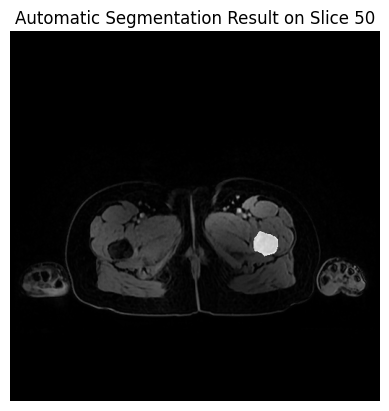

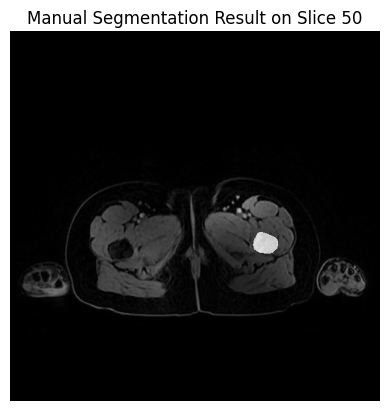

In [ ]:
def superimpose_images(image1, image2):
    image1 = image1 / np.max(image1)
    image2 = image2 / np.max(image2)
    alpha = 0.5
    superimposed_image = alpha * image1 + (1 - alpha) * image2
    return superimposed_image

slice_idx = 50

pred_path = ('/content/drive/MyDrive/Colab Notebooks/nnUNet_results/Dataset001_Tibia/predTs/msk_018.nii.gz')
pred_img = nib.load(pred_path)
pred_img_data = pred_img.get_fdata()
pred_img_data = np.expand_dims(pred_img_data, axis=-1)
print("Prediction Segmentation Shape: ", pred_img_data.shape)

raw_path = ('/content/drive/MyDrive/Colab Notebooks/nnUNet_raw/Dataset001_Tibia/imagesTs/msk_018_0000.nii.gz')
raw_img = nib.load(raw_path)
raw_img_data = raw_img.get_fdata()
# raw_img_data = np.expand_dims(raw_img_data, axis=-1)
print("Raw Scan Shape: ", raw_img_data.shape)

gt_path = '/content/drive/MyDrive/Colab Notebooks/nnUNet_results/Dataset001_Tibia/predTs/Groundtruth Segmentations/msk_018.nii.gz'
gt_img = nib.load(gt_path)
gt_img_data = gt_img.get_fdata()
print("Groundtruth Segmentation Shape: ", gt_img_data.shape)

image1 = raw_img_data[slice_idx, :, :, :]
image2 = pred_img_data[slice_idx, :, :, :]
superimposed_image = superimpose_images(image1, image2)
plt.imshow(superimposed_image, cmap='gray')
plt.axis('off')
plt.title(('Automatic Segmentation Result on Slice {}').format(slice_idx))
plt.show()

image1 = raw_img_data[slice_idx, :, :, :]
image2 = gt_img_data[slice_idx, :, :, :]
superimposed_image = superimpose_images(image1, image2)
plt.imshow(superimposed_image, cmap='gray')
plt.axis('off')
plt.title(('Manual Segmentation Result on Slice {}').format(slice_idx))
plt.show()


3D Visualisation of Segmentation Results

In [ ]:
import SimpleITK as sitk
import numpy as np
from skimage.measure import marching_cubes
%pip install trimesh
import trimesh

predfname = 'msk_018'
model_used = '2D-UNet'

def Export3DStructure(segmentation_data, predfname, class_msk, model_used):
    # Generate a surface mesh using marching cubes
    vertices, faces, normals, _ = marching_cubes(segmentation_data, level=0)

    # Create a Trimesh object
    mesh = trimesh.Trimesh(vertices=vertices, faces=faces, vertex_normals=normals)


    # Save the mesh as a PLY file
    ply_path = ('/content/drive/MyDrive/Colab Notebooks/nnUNet_results/Dataset001_Tibia/predTs/{}_{}_{}.ply').format(predfname, class_msk, model_used)
    mesh.export(ply_path)

# Load the NIfTI file
nifti_path = ('/content/drive/MyDrive/Colab Notebooks/nnUNet_results/Dataset001_Tibia/predTs/{}.nii.gz').format(predfname)
nifti_img = sitk.ReadImage(nifti_path)
segmentation_data_all = sitk.GetArrayFromImage(nifti_img)
segmentation_data_all = np.flip(segmentation_data_all)
segmentation_data_all = np.rot90(segmentation_data_all, k=2)

tibia_seg_data = np.where(segmentation_data_all != 1, 0, 1)
femur_seg_data = np.where(segmentation_data_all != 2, 0, 2)
fibula_seg_data = np.where(segmentation_data_all != 3, 0, 3)
pelvis_seg_data = np.where(segmentation_data_all != 4, 0, 4)

# segmentation_data = [segmentation_data_all, tibia_seg_data, femur_seg_data, fibula_seg_data, pelvis_seg_data]
# class_msk = ['ALL', 'TIBIA', 'FEMUR', 'FIBULA', 'PELVIS']

segmentation_data = [segmentation_data_all, tibia_seg_data, femur_seg_data, fibula_seg_data]
class_msk = ['ALL', 'TIBIA', 'FEMUR', 'FIBULA']
# Specify colors (RGBA format) for each class_msk
colors = [(255, 0, 0, 255),    # Red
          (0, 255, 0, 255),    # Green
          (0, 0, 255, 255),    # Blue
          (255, 255, 0, 255)]  # Yellow

for i in range (len(segmentation_data)):
  Export3DStructure(segmentation_data[i], predfname, class_msk[i], model_used)

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 685.4/685.4 kB 11.1 MB/s eta 0:00:00


Performance Evaluation

Prediction Segmentation Shape:  (542, 512, 512, 1)
Groundtruth Segmentation Shape:  (542, 512, 512, 1)


Dice Similarity Coefficient (DSC) Metric Values ---> TIBIA: 0.77, FEMUR: 0.86, FIBULA: 0.0, PELVIS: 0.64


Volume Error (VError) Metric Value ---> TIBIA: 0.31, FEMUR: 0.14, FIBULA: 1.0, PELVIS: 0.03




<ipython-input-8-651cf3f5075d>:27: RuntimeWarning: invalid value encountered in divide
  image1 = image1 / np.max(image1)
<ipython-input-8-651cf3f5075d>:28: RuntimeWarning: invalid value encountered in divide
  image2 = image2 / np.max(image2)
<ipython-input-8-651cf3f5075d>:79: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap_superimposed = plt.cm.get_cmap(cmap_binary)


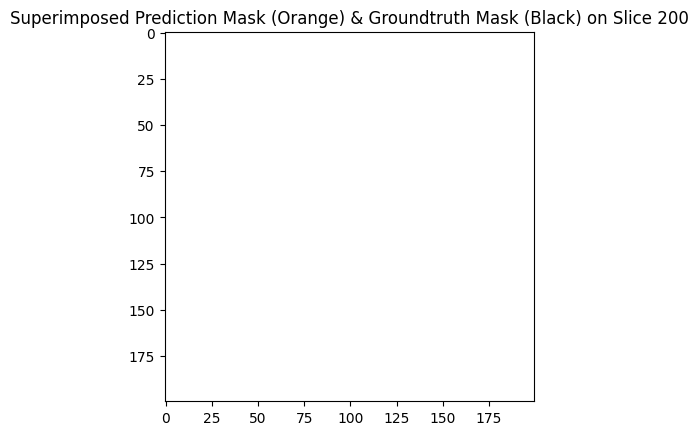

In [ ]:
from scipy.spatial.distance import directed_hausdorff


model = '2D UNet'
patient_fname = 'msk_004'
# Is the mask post processed?
post_processed = False

def volume_error(y_true, y_pred):
    # mm3
    Voxel_Volume = 2.63671875

    N_true = np.count_nonzero(y_true)
    N_pred = np.count_nonzero(y_pred)

    volume_error = np.abs(N_true - N_pred) * Voxel_Volume

    return round(volume_error * 0.001, 2)


def dice_coefficient(true_array, pred_array):
    true_array = np.asarray(true_array).astype(bool)
    pred_array = np.asarray(pred_array).astype(bool)

    intersection = np.logical_and(true_array, pred_array)
    dice = 2.0 * intersection.sum() / (true_array.sum() + pred_array.sum())

    return round(dice, 2)


def superimpose_images(image1, image2):
    image1 = image1 / np.max(image1)
    image2 = image2 / np.max(image2)
    alpha = 0.5
    superimposed_image = alpha * image1 + (1 - alpha) * image2
    return superimposed_image

pred_path = ('/content/drive/MyDrive/Colab Notebooks/nnUNet_results/Dataset001_Tibia/predTs/{}.nii.gz').format(patient_fname)
gt_path = ('/content/drive/MyDrive/Colab Notebooks/nnUNet_results/Dataset001_Tibia/predTs/Groundtruth Segmentations/{}.nii.gz').format(patient_fname)
pred_img = nib.load(pred_path)
gt_img = nib.load(gt_path)
pred_img_data = pred_img.get_fdata()
if (post_processed == False):
  pred_img_data = np.expand_dims(pred_img_data, axis=-1)
gt_img_data = gt_img.get_fdata()

tibia_seg_data_pred = np.where(pred_img_data != 1, 0, 1)
femur_seg_data_pred = np.where(pred_img_data != 2, 0, 1)
fibula_seg_data_pred = np.where(pred_img_data != 3, 0, 1)
pelvis_seg_data_pred = np.where(pred_img_data != 4, 0, 1)

tibia_seg_data_gt = np.where(gt_img_data != 1, 0, 1)
femur_seg_data_gt = np.where(gt_img_data != 2, 0, 1)
fibula_seg_data_gt = np.where(gt_img_data != 3, 0, 1)
pelvis_seg_data_gt = np.where(gt_img_data != 4, 0, 1)

# np.savetxt('output.txt', combined_mask[450,:,:,0], fmt="%d", delimiter=",")
print("Prediction Segmentation Shape: ", pred_img_data.shape)
print("Groundtruth Segmentation Shape: ", gt_img_data.shape)
print('\n')

DSC_TIBIA = dice_coefficient(tibia_seg_data_gt, tibia_seg_data_pred)
DSC_FEMUR = dice_coefficient(femur_seg_data_gt, femur_seg_data_pred)
DSC_FIBULA = dice_coefficient(fibula_seg_data_gt, fibula_seg_data_pred)
DSC_PELVIS = dice_coefficient(pelvis_seg_data_gt, pelvis_seg_data_pred)
print(('Dice Similarity Coefficient (DSC) Metric Values ---> TIBIA: {}, FEMUR: {}, FIBULA: {}, PELVIS: {}').format(DSC_TIBIA, DSC_FEMUR, DSC_FIBULA, DSC_PELVIS))
print('\n')

TIBIA_VError = volume_error(tibia_seg_data_gt, tibia_seg_data_pred)
FEMUR_VError = volume_error(femur_seg_data_gt, femur_seg_data_pred)
FIBULA_VError = volume_error(fibula_seg_data_gt, fibula_seg_data_pred)
PELVIS_VError = volume_error(pelvis_seg_data_gt, pelvis_seg_data_pred)
print(('Volume Error (VError) Metric Value ---> TIBIA: {}, FEMUR: {}, FIBULA: {}, PELVIS: {}').format(TIBIA_VError, FEMUR_VError, FIBULA_VError, PELVIS_VError))
print('\n')

slice = 200
cmap_binary = 'YlOrBr'
superimposed_image = superimpose_images(tibia_seg_data_gt[slice, :, :, :], tibia_seg_data_pred[slice, :, :, :])
# Define the cropping ranges
x_start, x_end = 200, 400
y_start, y_end = 200, 400
cropped_image = superimposed_image[y_start:y_end, x_start:x_end]
fig, ax = plt.subplots()
cmap_superimposed = plt.cm.get_cmap(cmap_binary)
ax.imshow(cropped_image, cmap=cmap_superimposed, vmin=0, vmax=1)
ax.axis('on')
plt.title(('Superimposed Prediction Mask (Orange) & Groundtruth Mask (Black) on Slice {}').format(slice))
plt.show()

Check Mask Validity

In [ ]:
def is_binarized_array(arr):
    if isinstance(arr, np.ndarray):
        return np.all((arr == 0) | (arr == 1))
    else:
        for element in arr:
            if element != 0 and element != 1:
                return False
        return True
# Example usage
binary_array = [0, 1, 0, 1, 1]
non_binary_array = [0, 1, 2, 1, 0]

print(is_binarized_array(fibula_seg_data_gt))  # Output: True
print(is_binarized_array(fibula_seg_data_pred))  # Output: False

True
False
